In [2]:
# import numba
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
864/4,6*6*6

(216.0, 216)

In [4]:
import os

In [5]:
os.chdir("simplemd/xyz")

FileNotFoundError: [Errno 2] No such file or directory: 'simplemd/xyz'

In [13]:
%%bash
python ./lattice.py 6 > start.xyz

In [19]:
for friction in [0.001,0.01,0.1,1.0,10.0,100.0]:
    with open("in-" + str(friction),"w") as f:
        print(re.sub("FRICTION",str(friction),"""
inputfile start.xyz
outputfile output.xyz
temperature 2
tstep 0.005
friction FRICTION
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies-FRICTION.dat
"""),file=f)

In [20]:
%%bash
for friction in 0.001 0.01 0.1 1.0 10.0 100.0
do
python ../python/simplemd.py < in-$friction &
done
wait

Neighbour list recomputed at step  0
List size:  864000
Neighbour list recomputed at step  9
List size:  864000
Neighbour list recomputed at step  20
List size:  864000
Neighbour list recomputed at step  32
List size:  864000
Neighbour list recomputed at step  44
List size:  864000
Neighbour list recomputed at step  57
List size:  864000
Neighbour list recomputed at step  68
List size:  864000
Neighbour list recomputed at step  79
List size:  864000
Neighbour list recomputed at step  90
List size:  864000
Neighbour list recomputed at step  101
List size:  864000
Neighbour list recomputed at step  112
List size:  864000
Neighbour list recomputed at step  122
List size:  864000
Neighbour list recomputed at step  133
List size:  864000
Neighbour list recomputed at step  143
List size:  864000
Neighbour list recomputed at step  152
List size:  864000
Neighbour list recomputed at step  163
List size:  864000
Neighbour list recomputed at step  173
List size:  864000
Neighbour list recomputed

In [24]:
energies={}
for friction in [0.001,0.01,0.1,1.0,10.0,100.0]:
    energies[friction]=np.loadtxt("energies-" + str(friction) + ".dat").T

In [26]:
energies[1.0].shape

(6, 2000)

(0.0, 10.0)

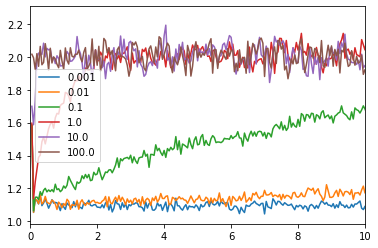

In [30]:
for friction in energies.keys():
    plt.plot(energies[friction][1],energies[friction][2],label=str(friction))
plt.legend()
plt.xlim((0,10))

(0.0, 10.0)

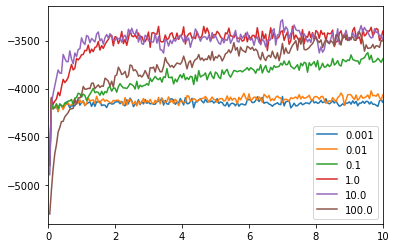

In [31]:
for friction in energies.keys():
    plt.plot(energies[friction][1],energies[friction][3],label=str(friction))
plt.legend()
plt.xlim((0,10))

In [33]:
Ts=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.0]
for T in Ts:
    with open("in-" + str(T),"w") as f:
        print(re.sub("T",str(T),"""
inputfile start.xyz
outputfile output.xyz
temperature T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies-T.dat
"""),file=f)

In [36]:
a=""
for T in Ts: a+=str(T)+" "
a

'0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.5 2.0 2.5 3.0 '

In [37]:
%%bash
for T in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.5 2.0 2.5 3.0
do
python ../python/simplemd.py < in-$T > /dev/null 2> /dev/null &
done
wait

In [38]:
energies_T={}
for T in Ts:
    energies_T[T]=np.loadtxt("energies-" + str(T) + ".dat").T

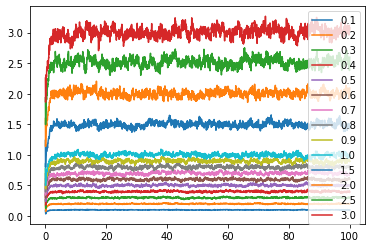

In [41]:
for T in Ts:
    plt.plot(energies_T[T][1],energies_T[T][2],label=str(T))
plt.legend()
#plt.xlim((0,10))

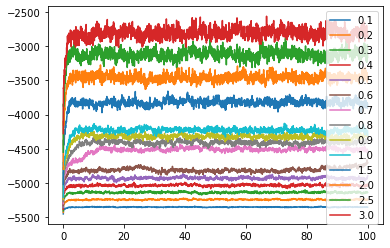

In [42]:
for T in Ts:
    plt.plot(energies_T[T][1],energies_T[T][3],label=str(T))
plt.legend()


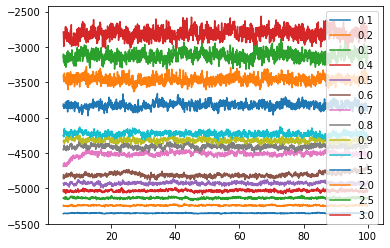

In [43]:
for T in Ts:
    plt.plot(energies_T[T][1,100:],energies_T[T][3,100:],label=str(T))
plt.legend()


In [48]:
U=[]
E=[]
for T in Ts:
    U.append(np.average(energies_T[T][3,100:]))
    E.append(np.average(energies_T[T][4,100:]))

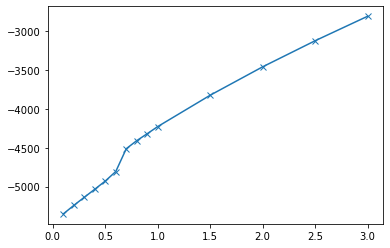

In [51]:
plt.plot(Ts,U,"x-")
#plt.plot(Ts,E,"x-")
#plt.plot(Ts,np.array(E)-np.array(U))

In [52]:
C_U=[]
C_K=[]
for T in Ts:
    C_U.append(np.std(energies_T[T][3,100:])**2/T**2)
    C_K.append(np.std(3/2*864*energies_T[T][2,100:])**2/T**2)

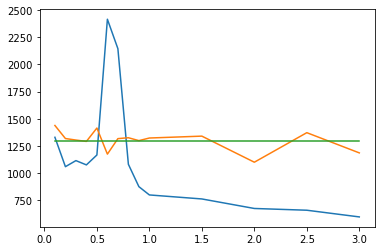

In [57]:
plt.plot(Ts,C_U)
plt.plot(Ts,C_K)
plt.plot(Ts,3/2*864*np.ones(len(Ts)))

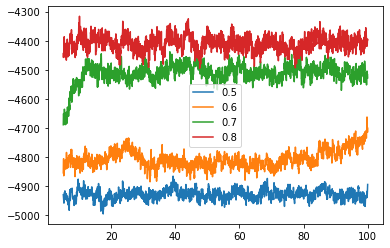

In [58]:
for T in [0.5,0.6,0.7,0.8]:
    plt.plot(energies_T[T][1,100:],energies_T[T][3,100:],label=str(T))
plt.legend()


In [60]:
Ts=[3.0]
for T in Ts:
    with open("in-" + str(T),"w") as f:
        print(re.sub("T",str(T),"""
inputfile start.xyz
outputfile hot.xyz
temperature T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies-T.dat
"""),file=f)

In [61]:
%%bash
for T in 3.0
do
python ../python/simplemd.py < in-$T > /dev/null 2> /dev/null &
done
wait

In [62]:
Ts=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.0]
for T in Ts:
    with open("in-" + str(T),"w") as f:
        print(re.sub("T",str(T),"""
inputfile hot.xyz
outputfile output.xyz
temperature T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
nconfig 10 trajectory.xyz
nstat   10 energies2-T.dat
"""),file=f)

In [63]:
%%bash
for T in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.5 2.0 2.5 3.0
do
python ../python/simplemd.py < in-$T > /dev/null 2> /dev/null &
done
wait

In [64]:
energies2_T={}
for T in Ts:
    energies2_T[T]=np.loadtxt("energies2-" + str(T) + ".dat").T

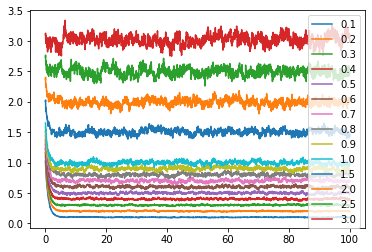

In [66]:
for T in Ts:
    plt.plot(energies2_T[T][1],energies2_T[T][2],label=str(T))
plt.legend()

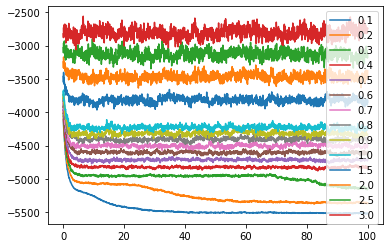

In [67]:
for T in Ts:
    plt.plot(energies2_T[T][1],energies2_T[T][3],label=str(T))
plt.legend()

In [68]:
U2=[]
E2=[]
for T in Ts:
    U2.append(np.average(energies2_T[T][3,100:]))
    E2.append(np.average(energies2_T[T][4,100:]))

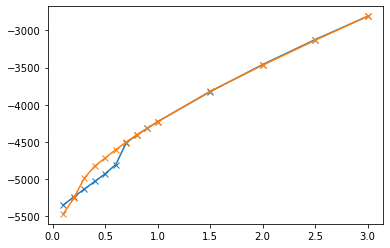

In [69]:
plt.plot(Ts,U,"x-")
plt.plot(Ts,U2,"x-")


In [72]:
Ts=[0.1]
for T in Ts:
    with open("in1-" + str(T),"w") as f:
        print(re.sub("T",str(T),"""
inputfile start.xyz
outputfile output.xyz
temperature T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
wrapatoms true
nconfig 10 trajectory1.xyz
nstat   10 energies-T.dat
"""),file=f)
    with open("in2-" + str(T),"w") as f:
        print(re.sub("T",str(T),"""
inputfile hot.xyz
outputfile output.xyz
temperature T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
wrapatoms true
nconfig 10 trajectory2.xyz
nstat   10 energies-T.dat
"""),file=f)

In [73]:
%%bash
for T in 0.1
do
python ../python/simplemd.py < in1-$T > /dev/null 2> /dev/null &
python ../python/simplemd.py < in2-$T > /dev/null 2> /dev/null &

done
wait

In [87]:
with open("inl","w") as f:
        print("""
inputfile start.xyz
outputfile output.xyz
temperature 0.5
tstep 0.005
friction 2.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
wrapatoms true
nconfig 10 trajectory_langevin.xyz
nstat   10 energies_langevin.dat
""",file=f)
with open("inv","w") as f:
    print("""
inputfile start.xyz
outputfile output.xyz
temperature 0.5
tstep 0.005
friction 2.0
forcecutoff 2.5
listcutoff  3.0
nstep 20000
wrapatoms true
nconfig 10 trajectory_vr.xyz
nstat   10 energies_vr.dat
""",file=f)

In [104]:
%%bash
for T in 0.1
do
#python ../python/simplemd.py < inl > /dev/null 2> /dev/null &
python ../python/simplemd_vr.py < inv > /dev/null 2> /dev/null &

done
wait

In [92]:
energies_langevin=np.loadtxt("energies_langevin.dat").T
energies_svr=np.loadtxt("energies_vr.dat").T

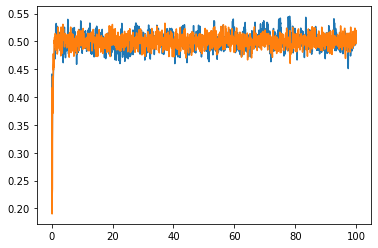

In [93]:
plt.plot(energies_langevin[1],energies_langevin[2])
plt.plot(energies_langevin[1],energies_vr[2])

(0.0, 10.0)

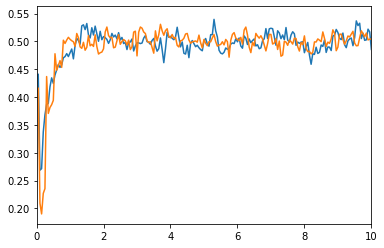

In [96]:
plt.plot(energies_langevin[1],energies_langevin[2])
plt.plot(energies_langevin[1],energies_vr[2])
plt.xlim((0,10))

(0.0, 10.0)

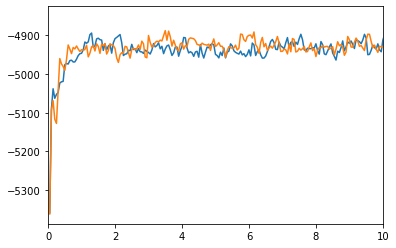

In [97]:
plt.plot(energies_langevin[1],energies_langevin[3])
plt.plot(energies_langevin[1],energies_vr[3])
plt.xlim((0,10))

In [103]:
T=0.5
print(np.std(energies_langevin[3,100:])**2/T**2,
      np.std(3/2*864*energies_langevin[2,100:])**2/T**2,
    np.std(energies_vr[3,100:])**2/T**2,
      np.std(3/2*864*energies_vr[2,100:])**2/T**2)

1228.815618532433 1296.7033245237021 703.4092369194499 775.8917711951228


In [102]:
3/2*864

1296.0

In [105]:
energies_svr=np.loadtxt("energies_vr.dat").T

In [106]:
T=0.5
print(np.std(energies_langevin[3,100:])**2/T**2,
      np.std(3/2*864*energies_langevin[2,100:])**2/T**2,
    np.std(energies_vr[3,100:])**2/T**2,
      np.std(3/2*864*energies_vr[2,100:])**2/T**2,
     np.std(energies_svr[3,100:])**2/T**2,
      np.std(3/2*864*energies_svr[2,100:])**2/T**2)

1228.815618532433 1296.7033245237021 703.4092369194499 775.8917711951228 1100.2499375396662 1314.743446535345


In [110]:
print(
np.average(energies_langevin[3,100]),
np.average(energies_vr[3,100]),
np.average(energies_svr[3,100]),
    
np.average(energies_langevin[2,100]),
np.average(energies_vr[2,100]),
np.average(energies_svr[2,100])

)

-4952.062604 -4924.584594 -4926.321023 0.505096 0.496573 0.502575
